In [1]:
import re
import sys
import glob
# import uproot
# import ROOT
import pandas as pd
import numpy  as np
import tables as tb

from os.path import expandvars, basename, join
from itertools import groupby

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
mass = dict({"e-": 0.511, "mu-": 105.658, "pi+": 139.57})

In [11]:
particle = "mu-"
filename = expandvars(f"$HOME/Software/WCSimFQTuningTools/Conversion/charge_distributions_{particle}.h5")

In [12]:
f = tb.open_file(filename)
keys_energies = np.array([(key, float(re.findall("E_(\d+(?:\.\d+)?)", key)[0])) for key in f.root._v_children.keys()]
                        , dtype = [("key", object), ("energy", float)])
keys_energies = np.sort(keys_energies, order="energy")

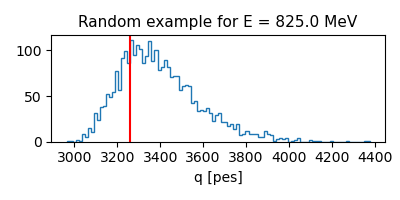

In [13]:
key_E = np.random.choice(keys_energies)
distribution = getattr(f.root, key_E[0]).read()

plt.figure(figsize=(4, 2))

plt.title(f"Random example for E = {key_E[1]} MeV", fontsize=11)

h, bins = np.histogram(distribution, bins=100)
plt.hist(distribution, bins=bins, histtype="step")
plt.axvline(bins[h.argmax()], color="r")

plt.xlabel("q [pes]")

plt.tight_layout()

In [14]:
qs = np.zeros(len(keys_energies))

for i, (key, energy) in enumerate(keys_energies):
    distribution = getattr(f.root, key).read()
    h, bins = np.histogram(distribution, bins=100)
    qs[i] = bins[h.argmax()]

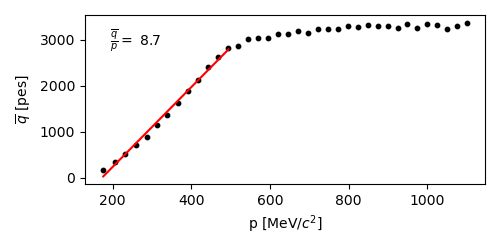

In [17]:
plimits = [100, 500]

m = mass[particle]
T = keys_energies["energy"]
momenta = np.sqrt((T+m)**2 - m**2)
sel = (plimits[0]<momenta) & (momenta<=plimits[1])

plt.figure(figsize=(5, 2.5))

plt.scatter(momenta, qs, color="k", s=10)

# fit
pars = np.polyfit(momenta[sel], qs[sel], deg=1)
xs = np.linspace(momenta[sel].min(), momenta[sel].max(), 100)
plt.plot(xs, (xs*pars[0] + pars[1]), color="r")

plt.text(np.mean(momenta)*0.3, qs.max()*0.85, r"$\frac{\overline{q}}{p}=$ " +  f"{np.round(pars, 1)[0]}")

plt.xlabel(r"p [MeV/$c^2$]")
plt.ylabel(r"$\overline{q}$ [pes]")

plt.tight_layout()